## Performance plots

- [Pattern Recognition](#Pattern-Recognition)
- [Resolution](#Resolution)
- [Efficiency](#Efficiency)
- [Rates](#Rates)

In [1]:
# Setup matplotlib
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Setup matplotlib
plt.style.use('tdrstyle.mplstyle')

from nn_plotting import (gaus, fit_gaus, separation_score, find_efficiency_errors, \
                         np_printoptions)

from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(plt.cm.viridis.colors, name='viridis_mod')
my_cmap.set_under('w',1)

In [3]:
from rootpy.plotting import Hist, Hist2D, Graph, Efficiency, Legend
from rootpy.io import root_open
from rootpy.memory.keepalive import keepalive
import rootpy.plotting.root2matplotlib as rplt

# Adjust matplotlib logging
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

Welcome to JupyROOT 6.14/09


In [4]:
infile_effie_0 = '../test6/histos_tbc_0_add.29a.root'
infile_effie_200 = '../test6/histos_tbc_200_add.29a.root'
infile_effie_0_displ = '../test6/histos_tbc_0_displ.29a.root'
infile_rates_200 = '../test6/histos_tbb_200_add.29a.root'
infile_rates_140 = '../test6/histos_tbb_140_add.29a.root'
infile_rates_250 = '../test6/histos_tbb_250_add.29a.root'
infile_rates_300 = '../test6/histos_tbb_300_add.29a.root'

hname2026_f = lambda hname: 'emtf2026_' + hname[5:]

save_as_pdf = lambda fig, figname: fig.savefig('.ipynb_plots/' + figname)

color_a = 'red'
color_b = 'blue'
color_c = 'magenta'

from six.moves import range, zip, map, filter

def draw_cms_lumi_puX(pu, axes=None):
  if axes is None:
    axes = plt.gca()
  axes.text(0.01, 1.02, r'CMS', fontsize=7.5, fontweight='bold', transform=axes.transAxes)
  axes.text(0.10, 1.02, r'Phase-2 Simulation', fontsize=7.5, transform=axes.transAxes)
  axes.text(0.99, 1.02, pu, fontsize=7.5, ha='right', transform=axes.transAxes)

def draw_cms_lumi_pu0(axes=None):
  draw_cms_lumi_puX(pu=r'<PU>=0', axes=axes)

def draw_cms_lumi_pu200(axes=None):
  draw_cms_lumi_puX(pu=r'<PU>=200', axes=axes)

def draw_cms_lumi_pu140to300(axes=None):
  draw_cms_lumi_puX(pu=r'<PU>=140,200,250,300', axes=axes)

### Pattern Recognition

In [5]:
def doit():
  fig, ax = plt.subplots()
  rplt.errorbar(h1c_eff.graph, color=color_c, ecolor=color_c, markerfacecolor=color_c, marker=',', lw=1.2, axes=ax)
  ax.set_xlabel(r'gen $p_{\mathrm{T}}$ [GeV]')
  ax.set_ylabel(r'$\varepsilon$')
  ax.set_xlim(0,120)
  ax.set_ylim(0,1.1)
  ax.plot([0,120], [0.97,0.97], color='gray', linestyle='dotted', lw=1)
  if pu == 0:
    draw_cms_lumi_pu0(axes=ax)
  elif pu == 200:
    draw_cms_lumi_pu200(axes=ax)
  plt.show()

/cvmfs/cms.cern.ch/slc7_amd64_gcc700/external/py2-matplotlib/2.2.4-pafccj/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


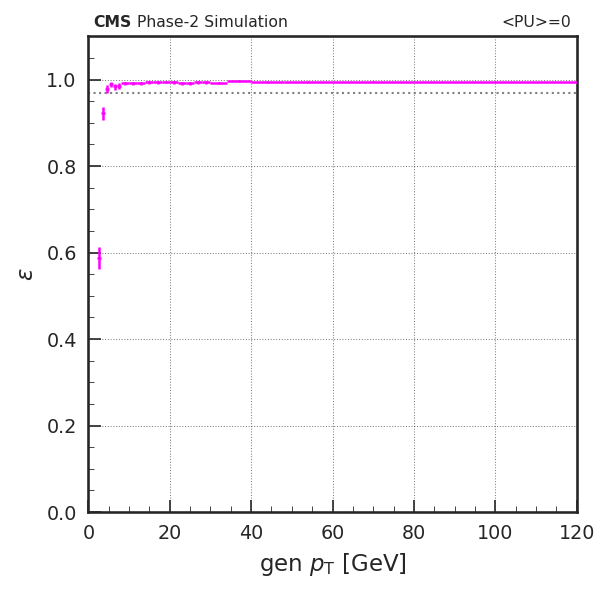

In [6]:
hname = 'emtf_eff_vs_genpt_croads'

with root_open(infile_effie_0) as f:
  pu = 0
  h1c_denom = f.Get(hname2026_f(hname) + '_denom')
  h1c_numer = f.Get(hname2026_f(hname) + '_numer')
  h1c_eff = Efficiency(h1c_numer, h1c_denom)

doit()

In [7]:
def doit():
  fig, ax = plt.subplots()
  rplt.errorbar(h1c_eff.graph, color=color_c, ecolor=color_c, markerfacecolor=color_c, marker=',', lw=1.2, axes=ax)
  ax.set_xlabel(r'gen $\eta$ {gen $p_{\mathrm{T}}$ > 20 GeV}')
  ax.set_ylabel(r'$\varepsilon$')
  ax.set_xlim(1.0,2.5)
  ax.set_ylim(0,1.1)
  ax.plot([1.0,2.5], [0.97,0.97], color='gray', linestyle='dotted', lw=1)
  if pu == 0:
    draw_cms_lumi_pu0(axes=ax)
  elif pu == 200:
    draw_cms_lumi_pu200(axes=ax)
  plt.show()

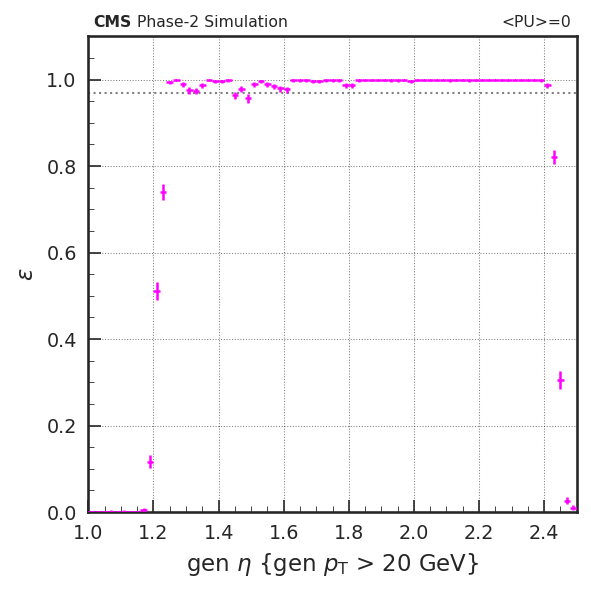

In [8]:
hname = 'emtf_eff_vs_geneta_croads'

with root_open(infile_effie_0) as f:
  pu = 0
  h1c_denom = f.Get(hname2026_f(hname) + '_denom')
  h1c_numer = f.Get(hname2026_f(hname) + '_numer')
  h1c_eff = Efficiency(h1c_numer, h1c_denom)

doit()

In [9]:
def doit():
  fig, ax = plt.subplots()
  rplt.errorbar(h1c_eff.graph, color=color_c, ecolor=color_c, markerfacecolor=color_c, marker=',', lw=1.2, axes=ax)
  ax.set_xlabel(r'gen $p_{\mathrm{T}}$ [GeV]')
  ax.set_ylabel(r'$\varepsilon$')
  ax.set_xlim(0,120)
  ax.set_ylim(0,1.1)
  ax.plot([0,120], [0.97,0.97], color='gray', linestyle='dotted', lw=1)
  if pu == 0:
    draw_cms_lumi_pu0(axes=ax)
  elif pu == 200:
    draw_cms_lumi_pu200(axes=ax)
  plt.show()

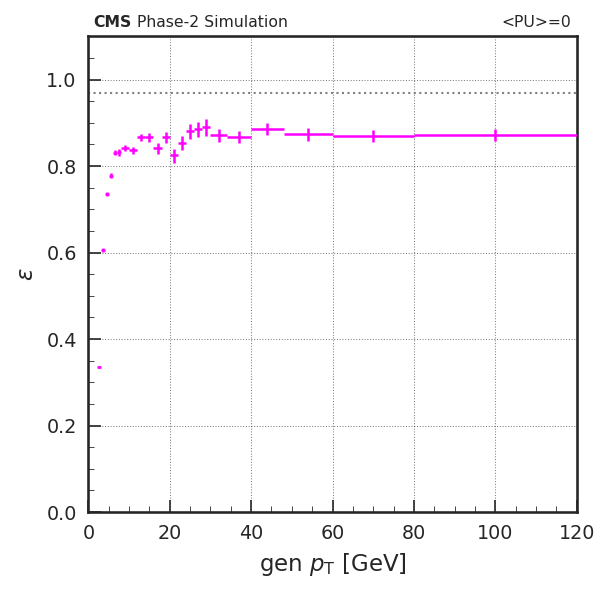

In [10]:
hname = 'emtf_eff_vs_genpt_croads'

with root_open(infile_effie_0_displ) as f:
  pu = 0
  h1c_denom = f.Get(hname2026_f(hname) + '_denom')
  h1c_numer = f.Get(hname2026_f(hname) + '_numer')
  h1c_eff = Efficiency(h1c_numer, h1c_denom)

doit()

In [11]:
def doit():
  fig, ax = plt.subplots()
  rplt.errorbar(h1c_eff.graph, color=color_c, ecolor=color_c, markerfacecolor=color_c, marker=',', lw=1.2, axes=ax)
  ax.set_xlabel(r'gen $\eta$ {gen $p_{\mathrm{T}}$ > 20 GeV}')
  ax.set_ylabel(r'$\varepsilon$')
  ax.set_xlim(1.0,2.5)
  ax.set_ylim(0,1.1)
  ax.plot([1.0,2.5], [0.97,0.97], color='gray', linestyle='dotted', lw=1)
  if pu == 0:
    draw_cms_lumi_pu0(axes=ax)
  elif pu == 200:
    draw_cms_lumi_pu200(axes=ax)
  plt.show()

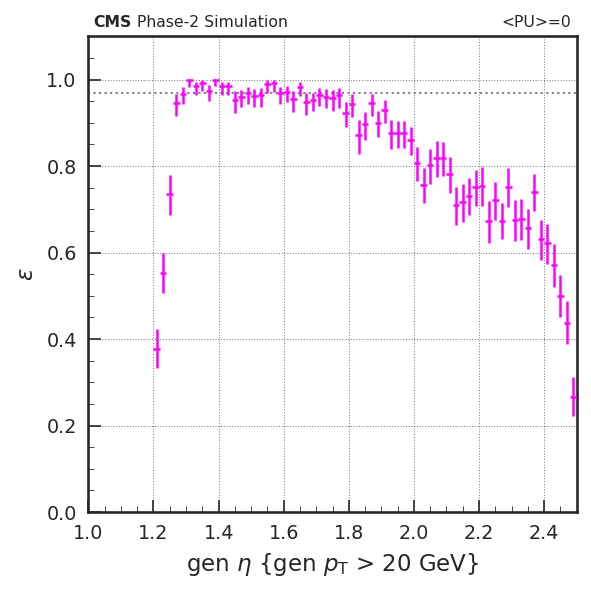

In [12]:
hname = 'emtf_eff_vs_geneta_croads'

with root_open(infile_effie_0_displ) as f:
  pu = 0
  h1c_denom = f.Get(hname2026_f(hname) + '_denom')
  h1c_numer = f.Get(hname2026_f(hname) + '_numer')
  h1c_eff = Efficiency(h1c_numer, h1c_denom)

doit()

In [13]:
def doit():
  fig, ax = plt.subplots()
  rplt.errorbar(h1c_eff.graph, color=color_c, ecolor=color_c, markerfacecolor=color_c, marker=',', lw=1.2, axes=ax)
  ax.set_xlabel(r'gen $|d_{0}|$ [cm] {gen $p_{\mathrm{T}}$ > 20 GeV}')
  ax.set_ylabel(r'$\varepsilon$')
  ax.set_xlim(0,120)
  ax.set_ylim(0,1.1)
  ax.plot([0,120], [0.97,0.97], color='gray', linestyle='dotted', lw=1)
  if pu == 0:
    draw_cms_lumi_pu0(axes=ax)
  elif pu == 200:
    draw_cms_lumi_pu200(axes=ax)
  plt.show()

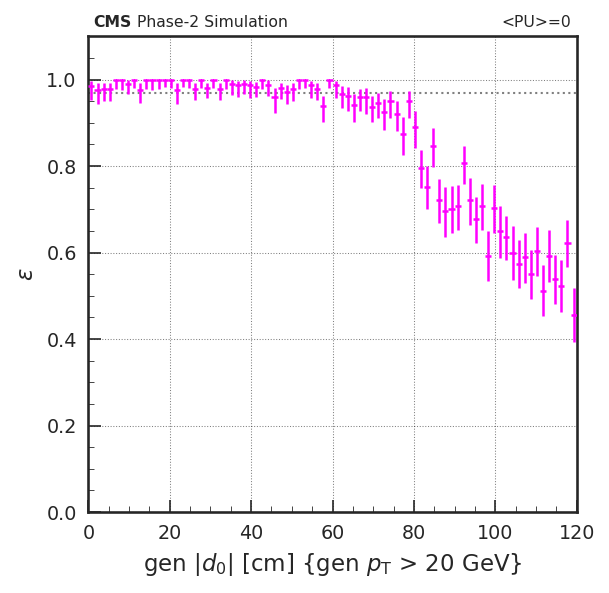

In [14]:
hname = 'emtf_eff_vs_gend0_croads'

with root_open(infile_effie_0_displ) as f:
  pu = 0
  h1c_denom = f.Get(hname2026_f(hname) + '_denom')
  h1c_numer = f.Get(hname2026_f(hname) + '_numer')
  h1c_eff = Efficiency(h1c_numer, h1c_denom)

doit()

In [15]:
def doit():
  fig, ax = plt.subplots()
  rplt.errorbar(h1c_eff.graph, color=color_c, ecolor=color_c, markerfacecolor=color_c, marker=',', lw=1.2, axes=ax)
  ax.set_xlabel(r'gen $|d_{z}|$ [cm] {gen $p_{\mathrm{T}}$ > 20 GeV}')
  ax.set_ylabel(r'$\varepsilon$')
  ax.set_xlim(0,40)
  ax.set_ylim(0,1.1)
  ax.plot([0,40], [0.97,0.97], color='gray', linestyle='dotted', lw=1)
  if pu == 0:
    draw_cms_lumi_pu0(axes=ax)
  elif pu == 200:
    draw_cms_lumi_pu200(axes=ax)
  plt.show()

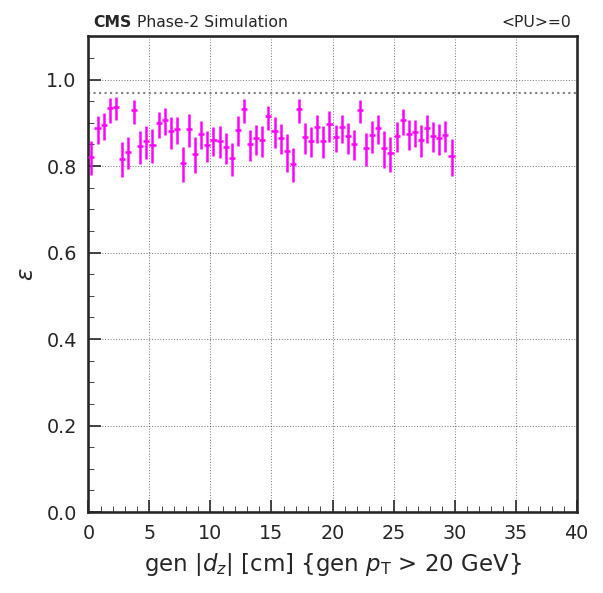

In [16]:
hname = 'emtf_eff_vs_gendz_croads'

with root_open(infile_effie_0_displ) as f:
  pu = 0
  h1c_denom = f.Get(hname2026_f(hname) + '_denom')
  h1c_numer = f.Get(hname2026_f(hname) + '_numer')
  h1c_eff = Efficiency(h1c_numer, h1c_denom)

doit()

### Resolution

In [17]:
def make_fits(h2):
  # Do gaussian fit to extract the resolution of each pT bin
  n = h2.GetNbinsX()
  gr1 = Graph(n)
  gr2 = Graph(n)
  for i in xrange(n):
    h_py = h2.ProjectionY('_py', i+1, i+1)
    if h_py.Integral() < 20:  # not enough stats
      continue

    if 50 <= i <= 60:  # high pT, not enough entries (300 bins -> 150)
      h_py.Rebin(2)
    elif i >= 86:      # low pT, resolution affected by finite bin width
      h_py = h2.ProjectionY('_py', i+1, i+2)  # merge i & (i+1) entries
      if i == 96:      # even lower pT, resolution affected by finite bin width
        h_py = h2.ProjectionY('_py', i+1, i+4)  # merge i & (i+4) entries
      elif i >= 96:
        continue

    r = h_py.Fit('gaus', 'SNQ', '', -1, 1.5)
    mean, sigma, meanErr, sigmaErr = r.Parameter(1), r.Parameter(2), r.ParError(1), r.ParError(2)
    x = 1.0/h2.GetXaxis().GetBinCenter(i+1)
    gr1.SetPoint(i, x, mean)
    gr1.SetPointError(i, 0, 0, meanErr, meanErr)
    gr2.SetPoint(i, x, sigma)
    gr2.SetPointError(i, 0, 0, sigmaErr, sigmaErr)
  return (gr1, gr2)

def doit():
  fig, ax = plt.subplots()
  rplt.hist2d(h, vmin=1, cmap=my_cmap, axes=ax)
  ax.set_xlabel(r'gen $q/p_{\mathrm{T}}$ [1/GeV]')
  ax.set_ylabel(r'$q/p_{\mathrm{T}}$ [1/GeV]')
  draw_cms_lumi_pu0(axes=ax)
  plt.show()

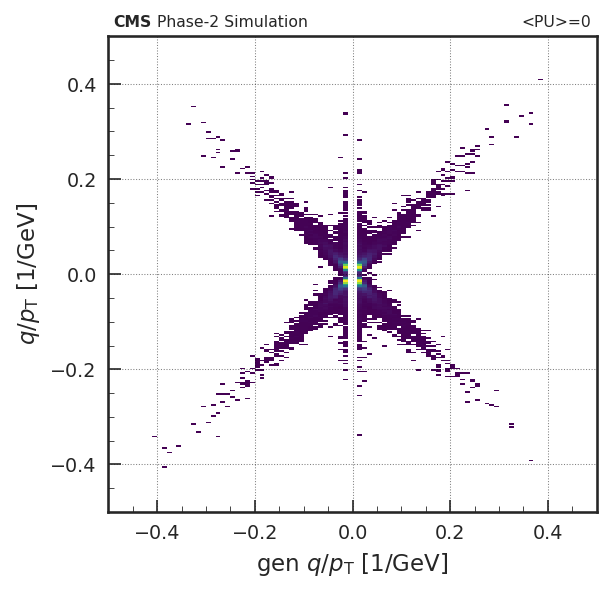

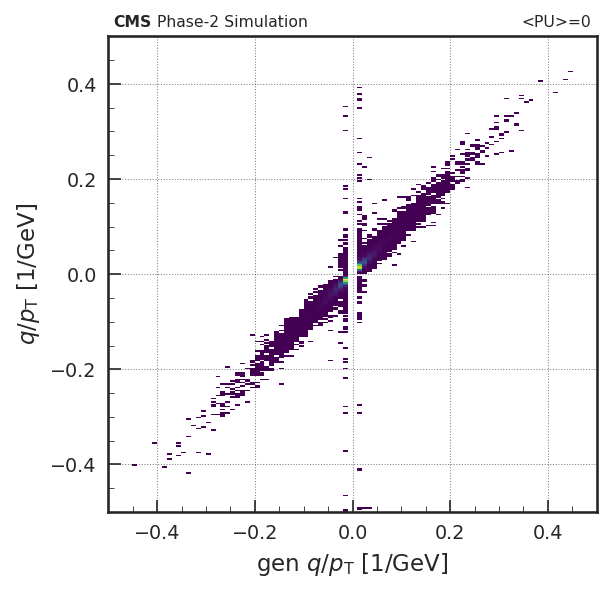

In [18]:
hname = 'emtf_l1pt_vs_genpt'

with root_open(infile_effie_0) as f:
  h2a = f.Get(hname)
  h2a.SetDirectory(0) # memory resident
  h2b = f.Get(hname2026_f(hname))
  h2b.SetDirectory(0) # memory resident

h = h2a
doit()

h = h2b
doit()

In [19]:
def doit1():
  fig, ax = plt.subplots()
  rplt.errorbar(gr1a, color=color_a, ecolor=color_a, markerfacecolor=color_a, marker='.', markersize=6.4, lw=0.8, axes=ax)
  rplt.errorbar(gr1b, color=color_b, ecolor=color_b, markerfacecolor=color_b, marker='.', markersize=6.4, lw=0.8, axes=ax)
  ax.set_xlabel(r'gen $p_{\mathrm{T}}$ [GeV]')
  ax.set_ylabel(r'$\Delta(p_{\mathrm{T}})/p_{\mathrm{T}}$ bias')
  ax.set_xlim(1,80)
  ax.set_ylim(-0.5,0.5)
  ax.set_xscale('log')
  ax.set_xticks(list(xrange(1,10)) + list(xrange(10,80,10)))
  draw_cms_lumi_pu0(axes=ax)
  plt.show()

def doit2():
  fig, ax = plt.subplots()
  rplt.errorbar(gr2a, color=color_a, ecolor=color_a, markerfacecolor=color_a, marker='.', markersize=6.4, lw=0.8, axes=ax)
  rplt.errorbar(gr2b, color=color_b, ecolor=color_b, markerfacecolor=color_b, marker='.', markersize=6.4, lw=0.8, axes=ax)
  ax.set_xlabel(r'gen $p_{\mathrm{T}}$ [GeV]')
  ax.set_ylabel(r'$\Delta(p_{\mathrm{T}})/p_{\mathrm{T}}$ resolution')
  ax.set_xlim(1,80)
  ax.set_ylim(0,0.5)
  ax.set_xscale('log')
  ax.set_xticks(list(xrange(1,10)) + list(xrange(10,80,10)))
  draw_cms_lumi_pu0(axes=ax)
  plt.show()

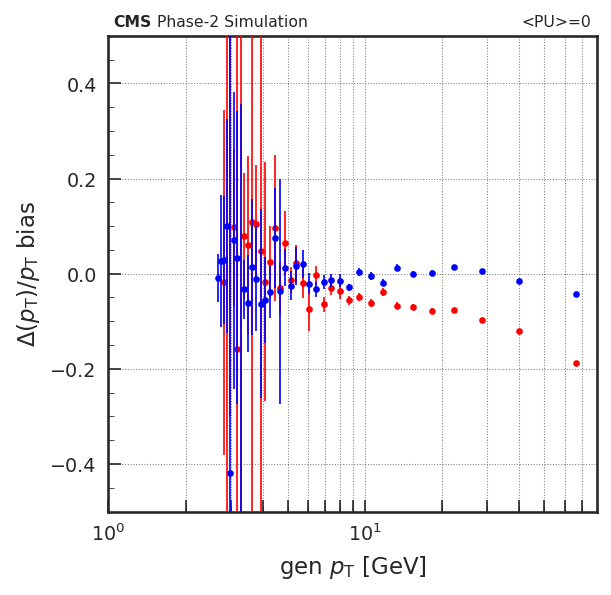

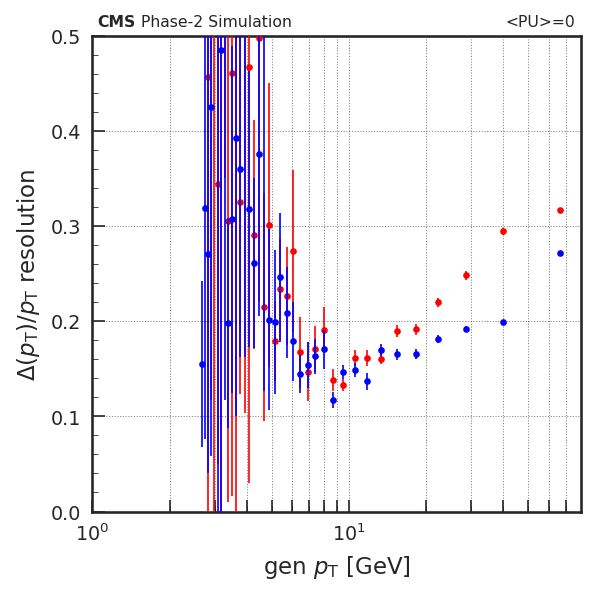

In [20]:
hname = 'emtf_l1ptres_vs_genpt'

with root_open(infile_effie_0) as f:
  h2a = f.Get(hname)
  gr1a, gr2a = make_fits(h2a)
  h2b = f.Get(hname2026_f(hname))
  gr1b, gr2b = make_fits(h2b)

doit1()

doit2()

### Efficiency

In [21]:
def doit():
  fig, ax = plt.subplots()
  rplt.errorbar(h1a_eff.graph, color=color_a, ecolor=color_a, markerfacecolor=color_a, marker=',', lw=1.2, axes=ax)
  rplt.errorbar(h1b_eff.graph, color=color_b, ecolor=color_b, markerfacecolor=color_b, marker=',', lw=1.2, axes=ax)
  ax.set_xlabel(r'gen $p_{\mathrm{T}}$ [GeV]')
  ax.set_ylabel(r'$\varepsilon$')
  ax.set_xlim(0,120)
  ax.set_ylim(0,1.1)
  ax.text(120, 1.05, r'L1 $p_{\mathrm{T}}$ > 20 GeV  ', fontsize=8, ha='right')
  ax.plot([0,120], [0.97,0.97], color='gray', linestyle='dotted', lw=1)
  if pu == 0:
    draw_cms_lumi_pu0(axes=ax)
    #save_as_pdf(fig, 'emtfpp_efficiency_vs_pt_pu0.pdf')
  elif pu == 200:
    draw_cms_lumi_pu200(axes=ax)
    #save_as_pdf(fig, 'emtfpp_efficiency_vs_pt_pu200.pdf')
  plt.show()

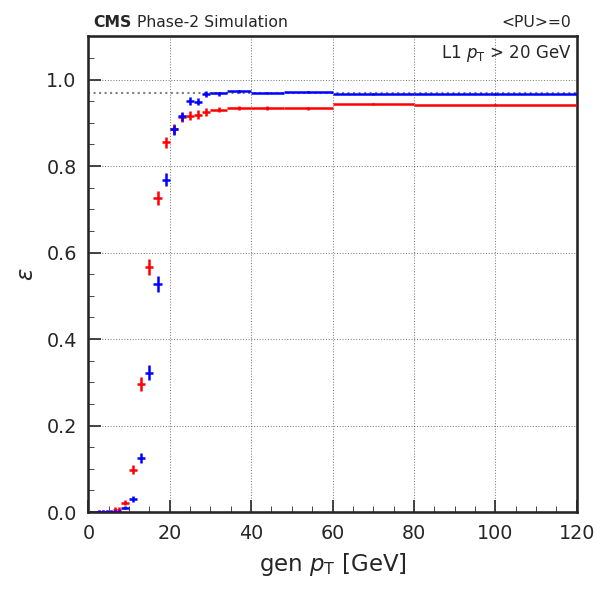

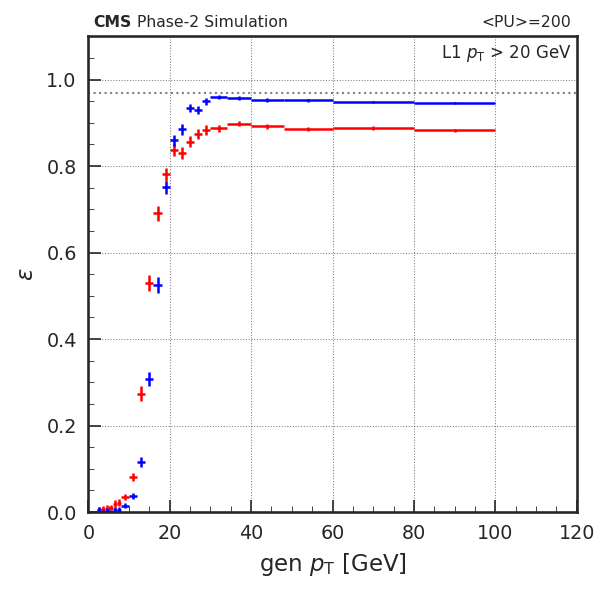

In [22]:
hname = 'emtf_eff_vs_genpt_l1pt20'

with root_open(infile_effie_0) as f:
  pu = 0
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

with root_open(infile_effie_200) as f:
  pu = 200
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

In [23]:
def doit():
  fig, ax = plt.subplots()
  rplt.errorbar(h1a_eff.graph, color=color_a, ecolor=color_a, markerfacecolor=color_a, marker=',', lw=1.2, axes=ax)
  rplt.errorbar(h1b_eff.graph, color=color_b, ecolor=color_b, markerfacecolor=color_b, marker=',', lw=1.2, axes=ax)
  ax.set_xlabel(r'gen $p_{\mathrm{T}}$ [GeV]')
  ax.set_ylabel(r'$\varepsilon$')
  ax.set_xlim(2,1000)
  ax.set_ylim(0,1.1)
  ax.text(1000, 1.05, r'L1 $p_{\mathrm{T}}$ > 20 GeV  ', fontsize=8, ha='right')
  ax.plot([2,1000], [0.97,0.97], color='gray', linestyle='dotted', lw=1)
  ax.set_xscale('log')
  if pu == 0:
    draw_cms_lumi_pu0(axes=ax)
  elif pu == 200:
    draw_cms_lumi_pu200(axes=ax)
  plt.show()

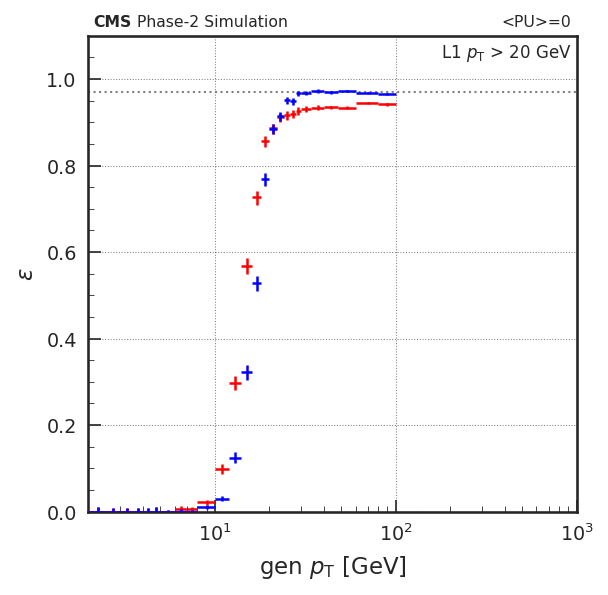

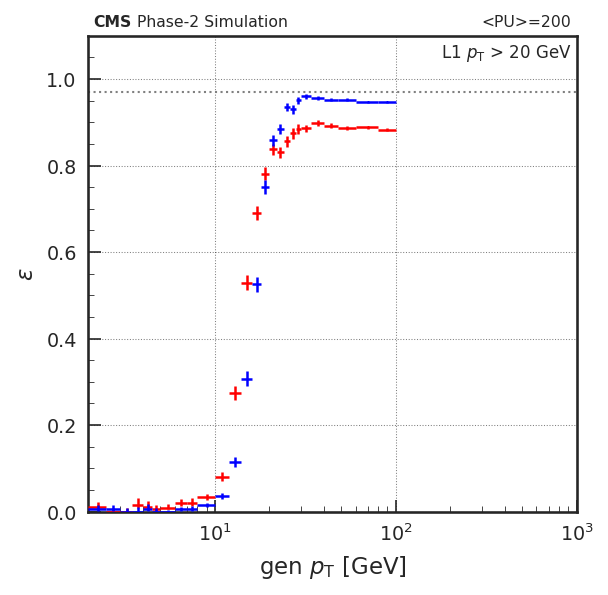

In [24]:
hname = 'emtf_eff_vs_genpt_highpt_l1pt20'

with root_open(infile_effie_0) as f:
  pu = 0
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

with root_open(infile_effie_200) as f:
  pu = 200
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

In [25]:
def doit():
  fig, ax = plt.subplots()
  rplt.errorbar(h1a_eff.graph, color=color_a, ecolor=color_a, markerfacecolor=color_a, marker=',', lw=1.2, axes=ax)
  rplt.errorbar(h1b_eff.graph, color=color_b, ecolor=color_b, markerfacecolor=color_b, marker=',', lw=1.2, axes=ax)
  ax.set_xlabel(r'gen $\eta$ {gen $p_{\mathrm{T}}$ > 20 GeV}')
  ax.set_ylabel(r'$\varepsilon$')
  ax.set_xlim(1.0,2.5)
  ax.set_ylim(0,1.1)
  ax.text(2.5, 1.05, r'L1 $p_{\mathrm{T}}$ > 20 GeV  ', fontsize=8, ha='right')
  ax.plot([1.0,2.5], [0.97,0.97], color='gray', linestyle='dotted', lw=1)
  if pu == 0:
    draw_cms_lumi_pu0(axes=ax)
    #save_as_pdf(fig, 'emtfpp_efficiency_vs_eta_pu0.pdf')
  elif pu == 200:
    draw_cms_lumi_pu200(axes=ax)
    #save_as_pdf(fig, 'emtfpp_efficiency_vs_eta_pu200.pdf')
  plt.show()

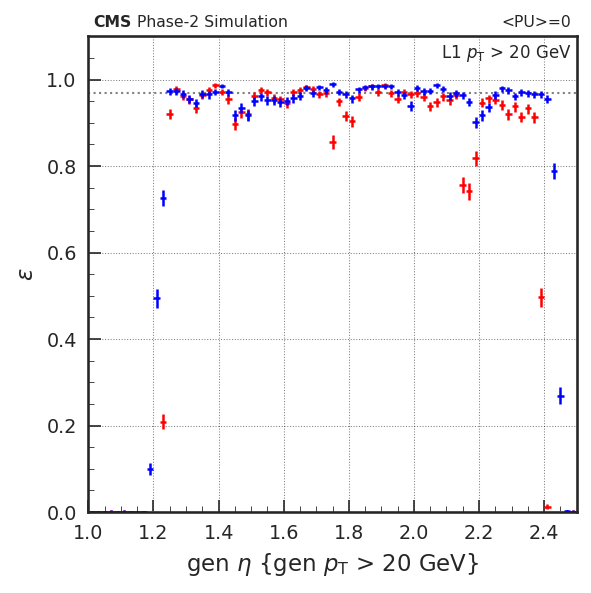

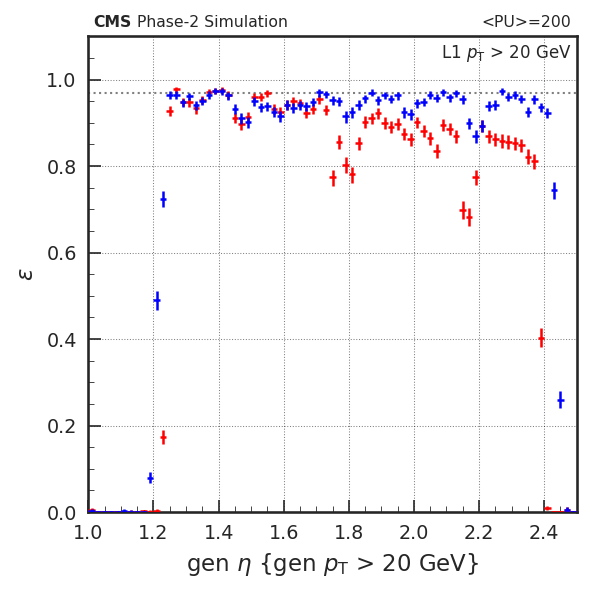

In [26]:
hname = 'emtf_eff_vs_geneta_l1pt20'

with root_open(infile_effie_0) as f:
  pu = 0
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

with root_open(infile_effie_200) as f:
  pu = 200
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

In [27]:
def doit():
  fig, ax = plt.subplots()
  rplt.errorbar(h1a_eff.graph, color=color_a, ecolor=color_a, markerfacecolor=color_a, marker=',', lw=1.2, axes=ax)
  rplt.errorbar(h1b_eff.graph, color=color_b, ecolor=color_b, markerfacecolor=color_b, marker=',', lw=1.2, axes=ax)
  ax.set_xlabel(r'gen $\eta$ {gen $p_{\mathrm{T}}$ > 20 GeV}')
  ax.set_ylabel(r'$\varepsilon$')
  ax.set_xlim(1.0,2.5)
  ax.set_ylim(0,1.1)
  ax.text(2.5, 1.05, r'L1 $p_{\mathrm{T}}$ > 0 GeV  ', fontsize=8, ha='right')
  ax.plot([1.0,2.5], [0.97,0.97], color='gray', linestyle='dotted', lw=1)
  if pu == 0:
    draw_cms_lumi_pu0(axes=ax)
  elif pu == 200:
    draw_cms_lumi_pu200(axes=ax)
  plt.show()

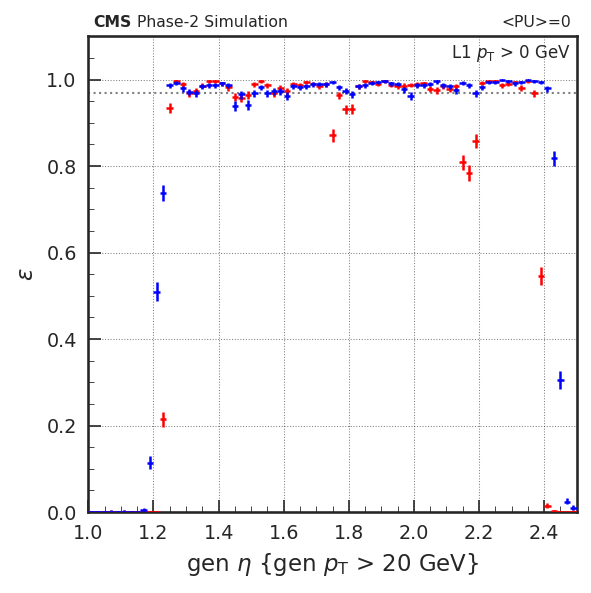

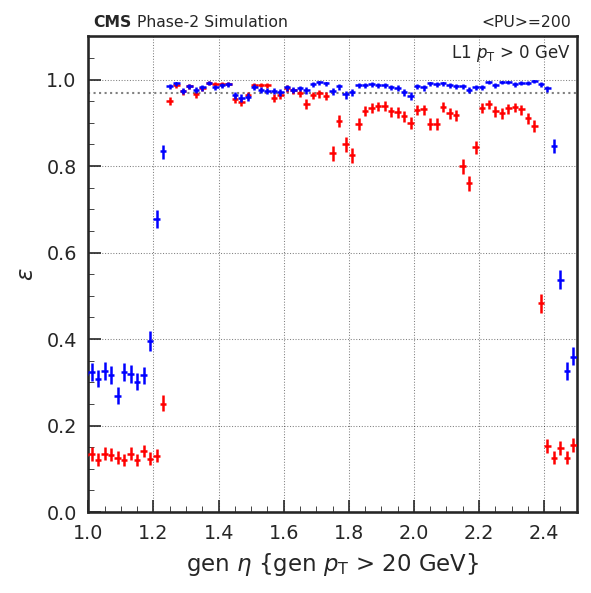

In [28]:
hname = 'emtf_eff_vs_geneta_l1pt0'

with root_open(infile_effie_0) as f:
  pu = 0
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

with root_open(infile_effie_200) as f:
  pu = 200
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

In [29]:
def doit():
  fig, ax = plt.subplots()
  rplt.errorbar(h1a_eff.graph, color=color_a, ecolor=color_a, markerfacecolor=color_a, marker=',', lw=1.2, axes=ax)
  rplt.errorbar(h1b_eff.graph, color=color_b, ecolor=color_b, markerfacecolor=color_b, marker=',', lw=1.2, axes=ax)
  ax.set_xlabel(r'gen $\phi$ {gen $p_{\mathrm{T}}$ > 20 GeV}')
  ax.set_ylabel(r'$\varepsilon$')
  ax.set_xlim(-190,190)
  ax.set_ylim(0,1.1)
  ax.text(190, 1.05, r'L1 $p_{\mathrm{T}}$ > 20 GeV  ', fontsize=8, ha='right')
  ax.plot([-190,190], [0.97,0.97], color='gray', linestyle='dotted', lw=1)
  if pu == 0:
    draw_cms_lumi_pu0(axes=ax)
  elif pu == 200:
    draw_cms_lumi_pu200(axes=ax)
  plt.show()

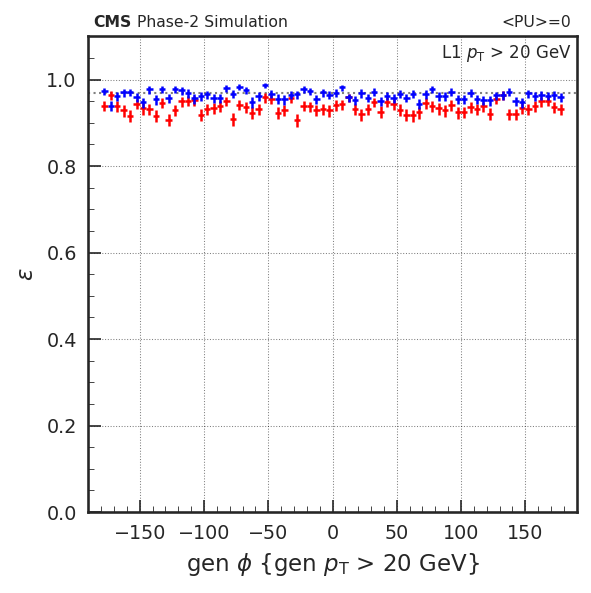

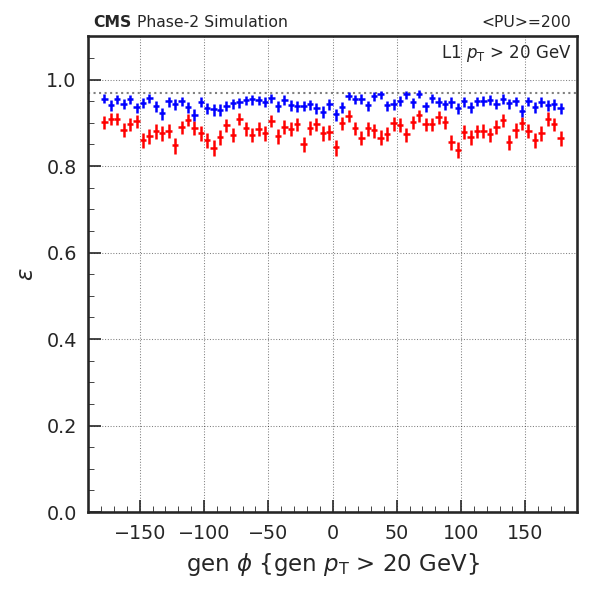

In [30]:
hname = 'emtf_eff_vs_genphi_l1pt20'

with root_open(infile_effie_0) as f:
  pu = 0
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

with root_open(infile_effie_200) as f:
  pu = 200
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

In [31]:
def doit():
  fig, ax = plt.subplots()
  rplt.errorbar(h1a_eff.graph, color=color_a, ecolor=color_a, markerfacecolor=color_a, marker=',', lw=1.2, axes=ax)
  rplt.errorbar(h1b_eff.graph, color=color_b, ecolor=color_b, markerfacecolor=color_b, marker=',', lw=1.2, axes=ax)
  ax.set_xlabel(r'gen $|d_{0}|$ [cm] {gen $p_{\mathrm{T}}$ > 20 GeV}')
  ax.set_ylabel(r'$\varepsilon$')
  ax.set_xlim(0,120)
  ax.set_ylim(0,1.1)
  ax.text(120, 1.05, r'L1 $p_{\mathrm{T}}$ > 20 GeV  ', fontsize=8, ha='right')
  ax.plot([0,120], [0.97,0.97], color='gray', linestyle='dotted', lw=1)
  if pu == 0:
    draw_cms_lumi_pu0(axes=ax)
  elif pu == 200:
    draw_cms_lumi_pu200(axes=ax)
  plt.show()

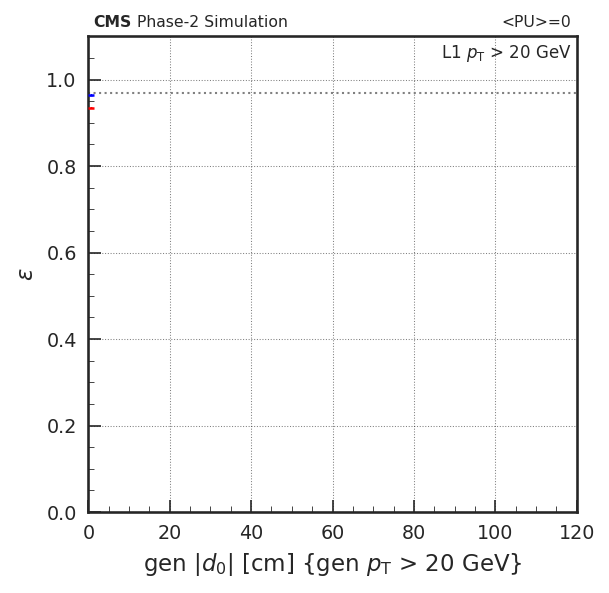

In [32]:
hname = 'emtf_eff_vs_gend0_l1pt20'

with root_open(infile_effie_0) as f:
  pu = 0
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

In [33]:
def doit():
  fig, ax = plt.subplots()
  rplt.errorbar(h1a_eff.graph, color=color_a, ecolor=color_a, markerfacecolor=color_a, marker=',', lw=1.2, axes=ax)
  rplt.errorbar(h1b_eff.graph, color=color_b, ecolor=color_b, markerfacecolor=color_b, marker=',', lw=1.2, axes=ax)
  ax.set_xlabel(r'gen $|d_{z}|$ [cm] {gen $p_{\mathrm{T}}$ > 20 GeV}')
  ax.set_ylabel(r'$\varepsilon$')
  ax.set_xlim(0,40)
  ax.set_ylim(0,1.1)
  ax.text(40, 1.05, r'L1 $p_{\mathrm{T}}$ > 20 GeV  ', fontsize=8, ha='right')
  ax.plot([0,40], [0.97,0.97], color='gray', linestyle='dotted', lw=1)
  if pu == 0:
    draw_cms_lumi_pu0(axes=ax)
  elif pu == 200:
    draw_cms_lumi_pu200(axes=ax)
  plt.show()

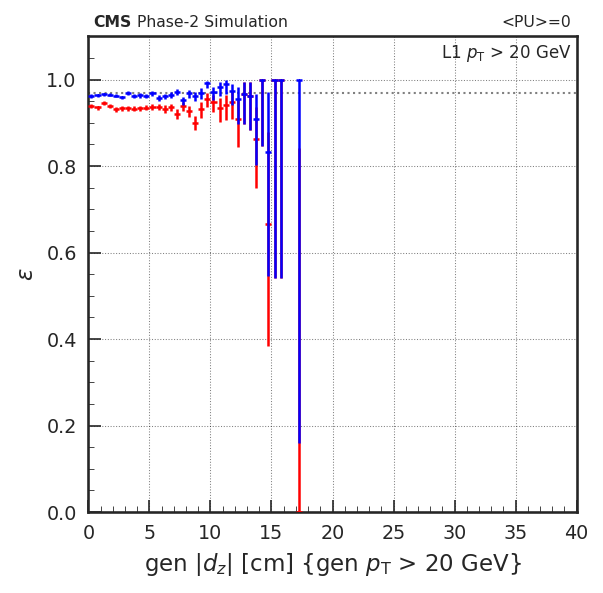

In [34]:
hname = 'emtf_eff_vs_gendz_l1pt20'

with root_open(infile_effie_0) as f:
  pu = 0
  h1a_denom = f.Get(hname + '_denom')
  h1a_numer = f.Get(hname + '_numer')
  h1b_denom = f.Get(hname2026_f(hname) + '_denom')
  h1b_numer = f.Get(hname2026_f(hname) + '_numer')
  h1a_eff = Efficiency(h1a_numer, h1a_denom)
  h1b_eff = Efficiency(h1b_numer, h1b_denom)

doit()

In [35]:
def doit():
  fig, ax = plt.subplots()
  color_list = ("#333333", "#377eb8", "#e41a1c", "#984ea3", "#ff7f00", "#4daf4a")
  pt_list = (0, 10, 20, 30, 40, 50)
  for i, eff in enumerate(effs):
    color = color_list[i]
    pt = pt_list[i]
    label = r'L1 $p_{\mathrm{T}}$ > %i GeV' % pt
    rplt.errorbar(eff.graph, color=color, ecolor=color, markerfacecolor=color, marker=',', lw=1.2, axes=ax, label=label)
  ax.set_xlabel(r'gen $p_{\mathrm{T}}$ [GeV]')
  ax.set_ylabel(r'$\varepsilon$')
  ax.set_xlim(0,120)
  ax.set_ylim(0,1.1)
  ax.plot([0,120], [0.90,0.90], color='gray', linestyle='dotted', lw=1)
  ax.legend(fontsize=9)
  if pu == 0:
    draw_cms_lumi_pu0(axes=ax)
  elif pu == 200:
    draw_cms_lumi_pu200(axes=ax)
  plt.show()

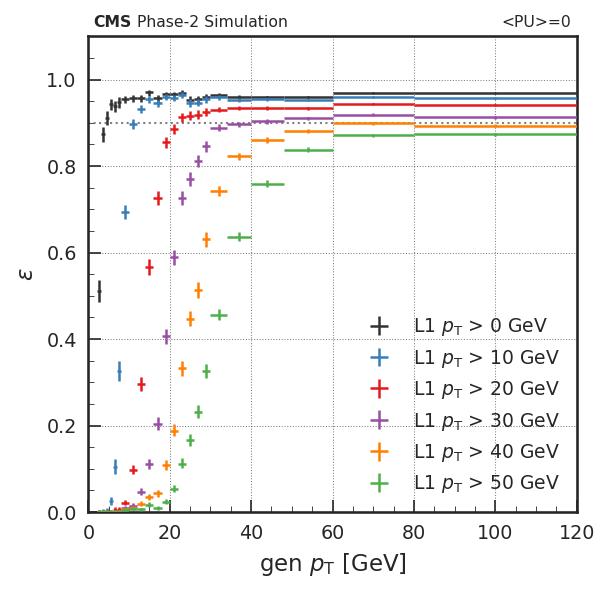

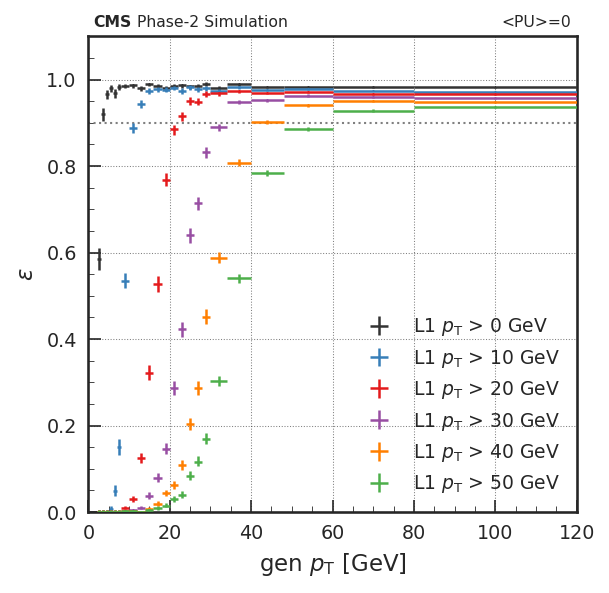

In [36]:
hname = 'emtf_eff_vs_genpt_l1pt%i'

with root_open(infile_effie_0) as f:
  pu = 0
  effs = []
  for l in (0, 10, 20, 30, 40, 50):
    denom = f.Get((hname % l) + '_denom')
    numer = f.Get((hname % l) + '_numer')
    eff = Efficiency(numer, denom)
    effs.append(eff)

doit()

with root_open(infile_effie_0) as f:
  pu = 0
  effs = []
  for l in (0, 10, 20, 30, 40, 50):
    denom = f.Get((hname2026_f(hname) % l) + '_denom')
    numer = f.Get((hname2026_f(hname) % l) + '_numer')
    eff = Efficiency(numer, denom)
    effs.append(eff)

doit()

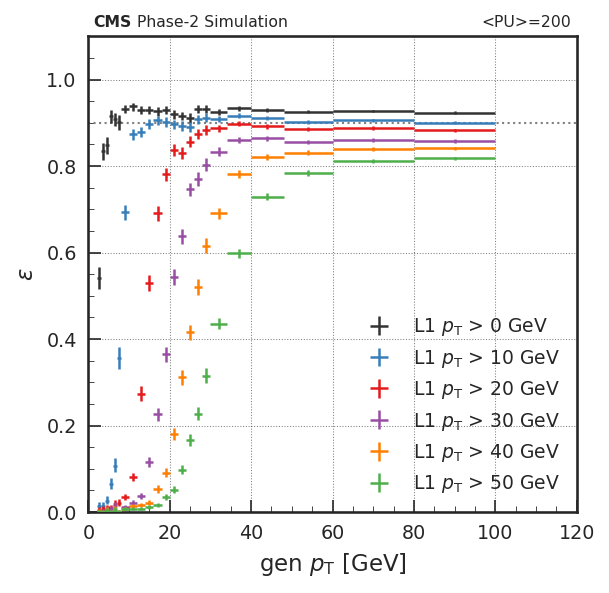

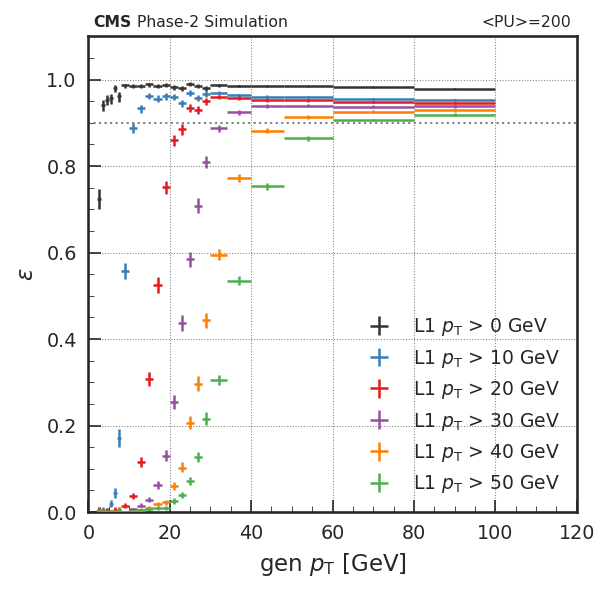

In [37]:
hname = 'emtf_eff_vs_genpt_l1pt%i'

with root_open(infile_effie_200) as f:
  pu = 200
  effs = []
  for l in (0, 10, 20, 30, 40, 50):
    denom = f.Get((hname % l) + '_denom')
    numer = f.Get((hname % l) + '_numer')
    eff = Efficiency(numer, denom)
    effs.append(eff)

doit()

with root_open(infile_effie_200) as f:
  pu = 200
  effs = []
  for l in (0, 10, 20, 30, 40, 50):
    denom = f.Get((hname2026_f(hname) % l) + '_denom')
    numer = f.Get((hname2026_f(hname) % l) + '_numer')
    eff = Efficiency(numer, denom)
    effs.append(eff)

doit()

### Rates

In [38]:
def make_ptcut(h):
  use_overflow = True
  binsum = 0
  binerr2 = 0
  for ib in xrange(h.GetNbinsX()+2-1, 0-1, -1):
    if (not use_overflow) and (ib == 0 or ib == h.GetNbinsX()+1):
      continue
    binsum += h.GetBinContent(ib)
    binerr2 += h.GetBinError(ib)**2
    h.SetBinContent(ib, binsum)
    h.SetBinError(ib, np.sqrt(binerr2))
  return

def make_rate(h, nevents):
  orbitFreq = 11.2456  # kHz
  nCollBunches = 2808  # assume lumi=8e34, PU=200, xsec_pp=80mb
  nZeroBiasEvents = float(nevents)
  convFactor = orbitFreq * nCollBunches / nZeroBiasEvents
  h.Scale(convFactor)
  return

In [39]:
def rplt_errorbar_filled(h, axes=None, **kwargs):
  if axes is None:
    axes = plt.gca()
  x = np.array(list(h.x()))
  y = np.array(list(h.y()))
  yerrl = np.array(list(h.yerrl()))
  yerrh = np.array(list(h.yerrh()))
  return axes.fill_between(x, y+yerrh, y-yerrl, **kwargs)

def draw_text(axes=None):
  if axes is None:
    axes = plt.gca()

  import re
  m = re.search(r'absEtaMin(\d*\.\d+|\d+)_absEtaMax(\d*\.\d+|\d+)', hname)
  try:
    #eta1 = m.group(1)
    #eta2 = m.group(2)
    eta1 = float(m.group(1))
    eta2 = float(m.group(2))
    text = r'${0} < |\eta| < {1}$'.format(eta1, eta2)
    axes.text(0.99, 0.95, text, fontsize=8, ha='right', transform=axes.transAxes)
  except:
    print('ERROR: regex failed.')

def doit():
  fig, axs = plt.subplots(2, 1, figsize=(4.2,4.2*6/5*8.4/8), gridspec_kw=dict(height_ratios=[5,1], hspace=0.08))
  ax = axs[0]
  ax.tick_params(labelbottom=False)
  rplt.hist(h1a, color=color_a, axes=ax)
  rplt_errorbar_filled(h1a, facecolor=color_a, alpha=0.2, axes=ax)
  rplt.hist(h1b, color=color_b, axes=ax)
  rplt_errorbar_filled(h1b, facecolor=color_b, alpha=0.2, axes=ax)
  ax.set_ylabel(r'Trigger rate [kHz]')
  ax.set_ylim(0.3,3e4)
  ax.set_yscale('log')
  draw_cms_lumi_pu200(axes=ax)
  draw_text(axes=ax)

  # Ratio plot
  ax = axs[1]
  ratio = h1a.Clone('ratio')
  ratio.Divide(h1b, h1a, 1, 1, '')
  rplt.hist(ratio, color=color_b, axes=ax)
  rplt_errorbar_filled(ratio, facecolor=color_b, alpha=0.2, axes=ax)
  ax.set_xlabel(r'L1 $p_{\mathrm{T}}$ threshold [GeV]')
  ax.set_ylabel(r'Ratio')
  ax.set_ylim(0,2)
  plt.show()

old rates @18/20/22/25 GeV: 61.6395645142, 50.0821456909, 43.1982192993, 33.7880783081
new rates @18/20/22/25 GeV: 20.9044017792, 16.420375824, 13.5152320862, 10.0416908264


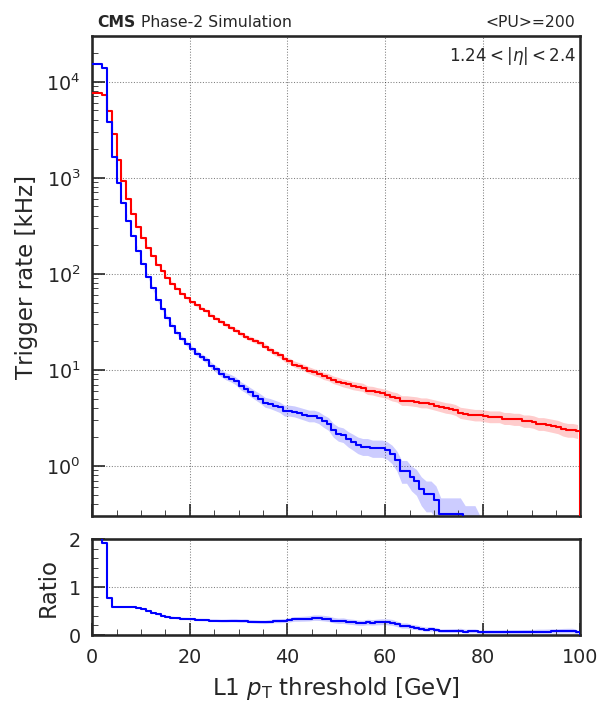

In [40]:
hname = 'emtf_absEtaMin1.24_absEtaMax2.4_qmin12_pt'

with root_open(infile_rates_200) as f:
  h_nevents = f.Get('nevents')
  assert(h_nevents != None)
  nevents = h_nevents.GetBinContent(2)

  h1a = f.Get('highest_' + hname)
  h1a.SetDirectory(0) # memory resident
  make_ptcut(h1a)
  make_rate(h1a, nevents)
  old_rates = [h1a.GetBinContent(h1a.FindBin(x)) for x in [18,20,22,25]]
  print('old rates @18/20/22/25 GeV: {0}, {1}, {2}, {3}'.format(*old_rates))

  h1b = f.Get('highest_' + hname2026_f(hname))
  h1b.SetDirectory(0) # memory resident
  make_ptcut(h1b)
  make_rate(h1b, nevents)
  new_rates = [h1b.GetBinContent(h1b.FindBin(x)) for x in [18,20,22,25]]
  print('new rates @18/20/22/25 GeV: {0}, {1}, {2}, {3}'.format(*new_rates))

doit()

old rates @18/20/22/25 GeV: 13.3257665634, 10.6732435226, 9.03120613098, 6.69446086884
new rates @18/20/22/25 GeV: 8.39965343475, 6.63130521774, 5.43135499954, 3.78931736946


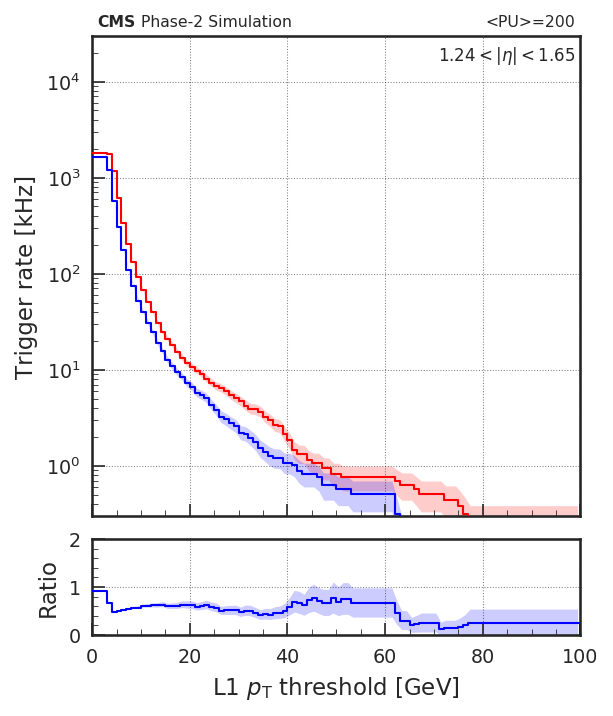

old rates @18/20/22/25 GeV: 30.2513828278, 24.567407608, 21.3464870453, 17.5571708679
new rates @18/20/22/25 GeV: 7.0733923912, 5.62082099915, 4.73664665222, 3.5366961956


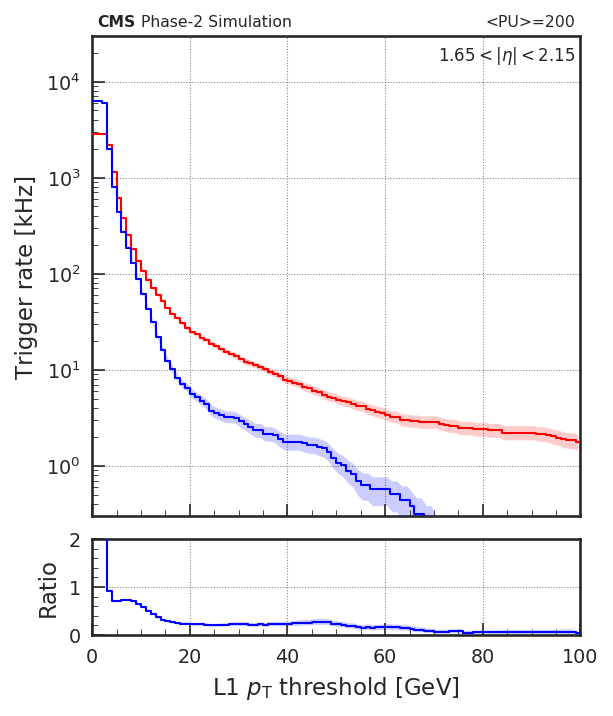

old rates @18/20/22/25 GeV: 18.1255683899, 14.8414926529, 12.8205242157, 9.5364484787
new rates @18/20/22/25 GeV: 5.43135499954, 4.16824913025, 3.34723043442, 2.71567749977


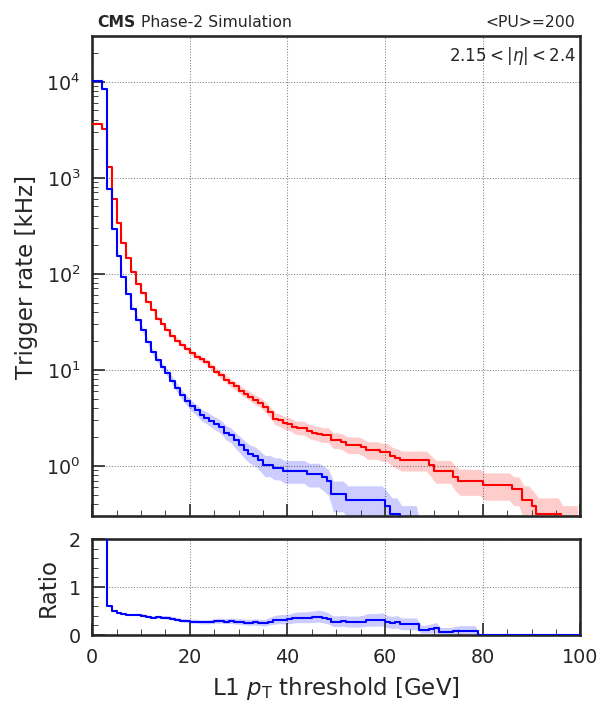

In [41]:
hnames = ['emtf_absEtaMin1.24_absEtaMax1.65_qmin12_pt',
          'emtf_absEtaMin1.65_absEtaMax2.15_qmin12_pt',
          'emtf_absEtaMin2.15_absEtaMax2.4_qmin12_pt',]

for hname in hnames:
  with root_open(infile_rates_200) as f:
    h_nevents = f.Get('nevents')
    assert(h_nevents != None)
    nevents = h_nevents.GetBinContent(2)

    h1a = f.Get('highest_' + hname)
    h1a.SetDirectory(0) # memory resident
    make_ptcut(h1a)
    make_rate(h1a, nevents)
    old_rates = [h1a.GetBinContent(h1a.FindBin(x)) for x in [18,20,22,25]]
    print('old rates @18/20/22/25 GeV: {0}, {1}, {2}, {3}'.format(*old_rates))

    h1b = f.Get('highest_' + hname2026_f(hname))
    h1b.SetDirectory(0) # memory resident
    make_ptcut(h1b)
    make_rate(h1b, nevents)
    new_rates = [h1b.GetBinContent(h1b.FindBin(x)) for x in [18,20,22,25]]
    print('new rates @18/20/22/25 GeV: {0}, {1}, {2}, {3}'.format(*new_rates))

  doit()

In [42]:
def rplt_errorbar_filled(h, axes=None, **kwargs):
  if axes is None:
    axes = plt.gca()
  x = np.array(list(h.x()))
  y = np.array(list(h.y()))
  yerrl = np.array(list(h.yerrl()))
  yerrh = np.array(list(h.yerrh()))
  return axes.fill_between(x, y+yerrh, y-yerrl, **kwargs)

def draw_text(axes=None):
  if axes is None:
    axes = plt.gca()

  import re
  m = re.search(r'absEtaMin(\d*\.\d+|\d+)_absEtaMax(\d*\.\d+|\d+)', hname)
  try:
    #eta1 = m.group(1)
    #eta2 = m.group(2)
    eta1 = float(m.group(1))
    eta2 = float(m.group(2))
    text = r'${0} < |\eta| < {1}$'.format(eta1, eta2)
    axes.text(0.99, 0.95, text, fontsize=8, ha='right', transform=axes.transAxes)
  except:
    print('ERROR: regex failed.')

def doit():
  fig, ax = plt.subplots()
  rplt.hist(h1a, color=color_a, axes=ax)
  rplt_errorbar_filled(h1a, facecolor=color_a, alpha=0.2, axes=ax)
  rplt.hist(h1b, color=color_b, axes=ax)
  rplt_errorbar_filled(h1b, facecolor=color_b, alpha=0.2, axes=ax)
  ax.set_xlabel(r'L1 $p_{\mathrm{T}}$ threshold [GeV]')
  ax.set_ylabel(r'Trigger rate [kHz]')
  ax.set_ylim(0.3,3e4)
  ax.set_yscale('log')
  draw_cms_lumi_pu200(axes=ax)
  #save_as_pdf(fig, 'emtfpp_rates_vs_pt_pu200.pdf')
  draw_text(axes=ax)
  plt.show()

old rates @18/20/22/25 GeV: 61.6395645142, 50.0821456909, 43.1982192993, 33.7880783081
new rates @18/20/22/25 GeV: 20.9044017792, 16.420375824, 13.5152320862, 10.0416908264


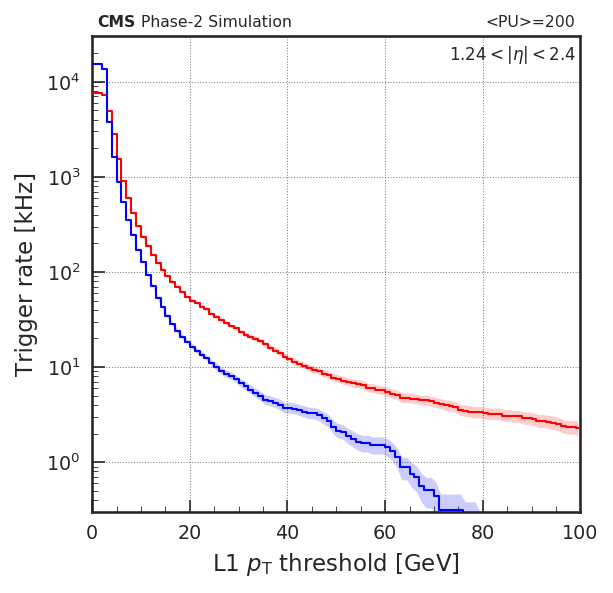

In [43]:
hname = 'emtf_absEtaMin1.24_absEtaMax2.4_qmin12_pt'

with root_open(infile_rates_200) as f:
  h_nevents = f.Get('nevents')
  assert(h_nevents != None)
  nevents = h_nevents.GetBinContent(2)

  h1a = f.Get('highest_' + hname)
  h1a.SetDirectory(0) # memory resident
  make_ptcut(h1a)
  make_rate(h1a, nevents)
  old_rates = [h1a.GetBinContent(h1a.FindBin(x)) for x in [18,20,22,25]]
  print('old rates @18/20/22/25 GeV: {0}, {1}, {2}, {3}'.format(*old_rates))

  h1b = f.Get('highest_' + hname2026_f(hname))
  h1b.SetDirectory(0) # memory resident
  make_ptcut(h1b)
  make_rate(h1b, nevents)
  new_rates = [h1b.GetBinContent(h1b.FindBin(x)) for x in [18,20,22,25]]
  print('new rates @18/20/22/25 GeV: {0}, {1}, {2}, {3}'.format(*new_rates))

doit()

In [44]:
def find_slope(x, y):
  from sklearn.linear_model import LinearRegression
  reg = LinearRegression(fit_intercept=False).fit(np.atleast_2d(x).T, y)
  return reg.coef_[0]

def doit():
  fig, ax = plt.subplots()
  rplt.errorbar(gr1a, color=color_a, ecolor=color_a, markerfacecolor=color_a, marker='.', markersize=8.4, lw=1.2, axes=ax)
  rplt.errorbar(gr1b, color=color_b, ecolor=color_b, markerfacecolor=color_b, marker='.', markersize=8.4, lw=1.2, axes=ax)
  for x, y in zip(gr1a.x(), gr1a.y()):
    ax.text(x + 2, y + 3, '%.1f' % y, fontsize=8)
  for x, y in zip(gr1b.x(), gr1b.y()):
    ax.text(x + 2, y + 3, '%.1f' % y, fontsize=8)

  if False:
    # From Osvaldo's trigger xsec study
    #p0 = -0.004091 +- 0.001251
    #p1 = 0.02187 +- 6.462e-5
    #p2 = 9.102e-5 +- 5.429e-7
    get_rates_from_run2_xsec = lambda x: -0.004091 + 0.02187*x + 9.102e-5*x*x
    x = np.arange(0,350)
    y = get_rates_from_run2_xsec(x)
    y *= 2808
    y /= 1000
    ax.plot(x, y, color='#cccccc', linestyle='dashed', lw=1)

  if True:
    m = find_slope(list(gr1a.x()), list(gr1a.y()))
    x = np.arange(0,350)
    y = m * x
    ax.plot(x, y, color=color_a, linestyle='dashed', lw=1, alpha=0.2)
    m = find_slope(list(gr1b.x()), list(gr1b.y()))
    x = np.arange(0,350)
    y = m * x
    ax.plot(x, y, color=color_b, linestyle='dashed', lw=1, alpha=0.2)

  ax.set_xlabel(r'# of pileup vertices')
  ax.set_ylabel(r'Trigger rate [kHz]')
  ax.set_xlim(0,350)
  ax.set_ylim(0,110)
  ax.text(350, 105, r'L1 $p_{\mathrm{T}}$ > 20 GeV  ', fontsize=8, ha='right')
  draw_cms_lumi_pu140to300(axes=ax)
  plt.show()

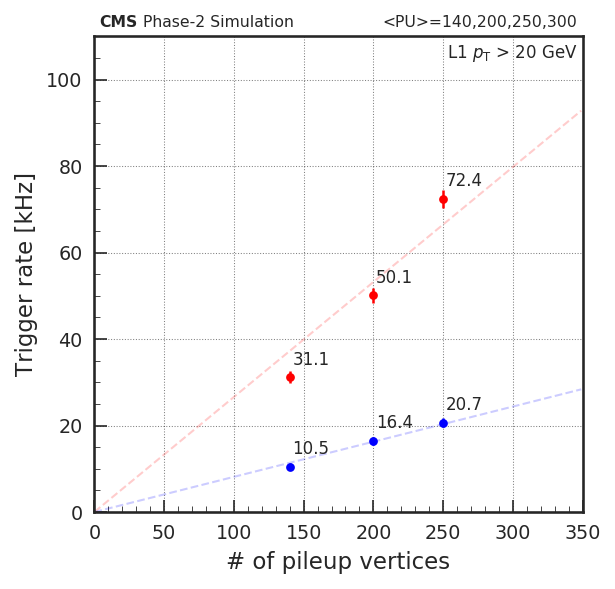

In [45]:
hname = 'emtf_absEtaMin1.24_absEtaMax2.4_qmin12_pt'

#pileup_list = [140, 200, 250, 300]
#infile_list = [infile_rates_140, infile_rates_200, infile_rates_250, infile_rates_300]

pileup_list = [140, 200, 250]
infile_list = [infile_rates_140, infile_rates_200, infile_rates_250]

gr1a = Graph(len(pileup_list))
gr1b = Graph(len(pileup_list))

for i, (pu, infile) in enumerate(zip(pileup_list, infile_list)):
  with root_open(infile) as f:
    h_nevents = f.Get('nevents')
    assert(h_nevents != None)
    nevents = h_nevents.GetBinContent(2)

    h1a = f.Get('highest_' + hname)
    h1a.SetDirectory(0) # memory resident
    make_ptcut(h1a)
    make_rate(h1a, nevents)
    rate, rate_err = h1a.GetBinContent(h1a.FindBin(20)), h1a.GetBinError(h1a.FindBin(20))
    gr1a.SetPoint(i, pu, rate)
    gr1a.SetPointError(i, 0, 0, rate_err, rate_err)

    h1b = f.Get('highest_' + hname2026_f(hname))
    h1b.SetDirectory(0) # memory resident
    make_ptcut(h1b)
    make_rate(h1b, nevents)
    rate, rate_err = h1b.GetBinContent(h1b.FindBin(20)), h1b.GetBinError(h1b.FindBin(20))
    gr1b.SetPoint(i, pu, rate)
    gr1b.SetPointError(i, 0, 0, rate_err, rate_err)

doit()

In [46]:
def doit():
  fig, ax = plt.subplots()
  rplt.hist(h1a, color=color_a, axes=ax)
  rplt.hist(h1b, color=color_b, axes=ax)
  rplt.hist(h1a, color=color_a, fill=True, alpha=0.2, axes=ax)
  rplt.hist(h1b, color=color_b, fill=True, alpha=0.2, axes=ax)
  rplt.errorbar(h1a, color=color_a, ecolor=color_a, markerfacecolor=color_a, marker=',', lw=1, axes=ax)
  rplt.errorbar(h1b, color=color_b, ecolor=color_b, markerfacecolor=color_b, marker=',', lw=1, axes=ax)
  ax.set_xlabel(r'L1 muon $|\eta|$')
  ax.set_ylabel(r'Trigger rate per unit $\eta$ [kHz]')
  ax.set_xlim(1.0,2.5)
  ax.set_ylim(0,11)
  ax.text(2.5, 10.5, r'L1 $p_{\mathrm{T}}$ > 20 GeV  ', fontsize=8, ha='right')
  draw_cms_lumi_pu200(ax)
  plt.show()

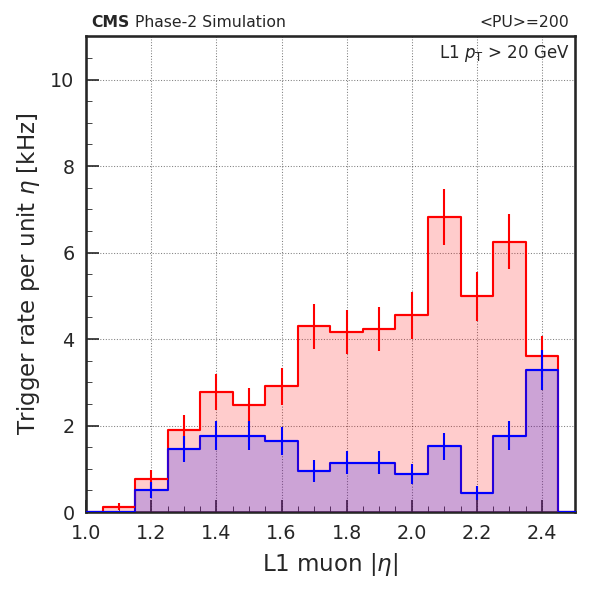

In [47]:
hname = 'emtf_ptmin20_qmin12_eta'

with root_open(infile_rates_200) as f:
  h_nevents = f.Get('nevents')
  assert(h_nevents != None)
  nevents = h_nevents.GetBinContent(2)

  h1a = f.Get(hname)
  h1a.SetDirectory(0) # memory resident
  make_rate(h1a, nevents)

  h1b = f.Get(hname2026_f(hname))
  h1b.SetDirectory(0) # memory resident
  make_rate(h1b, nevents)

doit()